In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

# 모든 사람의 키를 인치로 만들기
train_df.insert(4, 'Height(Inches)', train_df.apply(lambda x: int(x['Height(Feet)']) * 12 + int(x['Height(Remainder_Inches)']), axis=1))
test_df.insert(4, 'Height(Inches)', test_df.apply(lambda x: int(x['Height(Feet)']) * 12 + int(x['Height(Remainder_Inches)']), axis=1))

# 필요없는 데이터 Drop
train_df = train_df.drop(['ID', 'Height(Feet)', 'Height(Remainder_Inches)'], axis=1)
test_df = test_df.drop(['ID', 'Height(Feet)', 'Height(Remainder_Inches)'], axis=1)

In [3]:
# Weight_Status, Gender 열을 숫자 데이터로 변환
train_df['Weight_Status'] = train_df['Weight_Status'].map({'Normal Weight': 0, 'Overweight': 1, 'Obese': 2})
train_df['Gender'] = train_df['Gender'].map({'M': 0, 'F': 1})
test_df['Weight_Status'] = test_df['Weight_Status'].map({'Normal Weight': 0, 'Overweight': 1, 'Obese': 2})
test_df['Gender'] = test_df['Gender'].map({'M': 0, 'F': 1})

In [4]:
# PolynomialFeatures를 사용하여 데이터 전처리
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(train_df.drop('Calories_Burned', axis=1))
y = train_df['Calories_Burned']

In [5]:
# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# train, valid 데이터 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [27]:
# 회귀 신경망 모델 학습
mlp = MLPRegressor(hidden_layer_sizes=(1024, 256, 2), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1024, 256, 2), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

<AxesSubplot:>

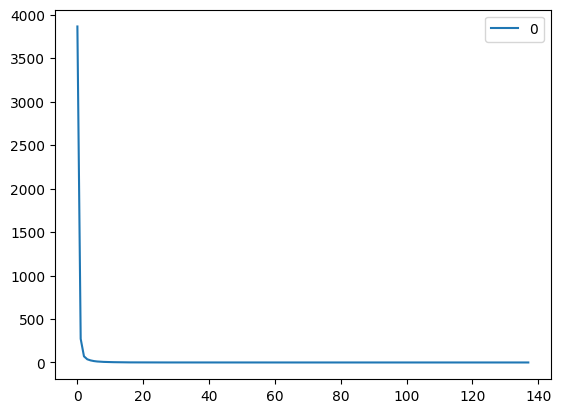

In [28]:
pd.DataFrame(mlp.loss_curve_).plot()

In [29]:
# valid 데이터 예측 및 평가
y_pred_valid = mlp.predict(X_valid)
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Valid 데이터 RMSE: {rmse_valid:.3f}")

Valid 데이터 RMSE: 0.431


In [30]:
# # test 데이터 예측
# X_test = test_df.values
# X_poly_test = poly.transform(X_test)
# X_test_scaled = scaler.transform(X_poly_test)
# y_pred_test = mlp.predict(X_test_scaled)

In [31]:
# # 결과 저장
# sample_submission_df['Calories_Burned'] = y_pred_test
# sample_submission_df.to_csv('submission_MLP_Poly.csv', index=False)